<a href="https://colab.research.google.com/github/Diezelots/GDG/blob/main/%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/서강대 화공/train.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.describe()
df.head() / df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age: 177
Cabin: 687
결측치 발생

<Axes: xlabel='Survived', ylabel='count'>

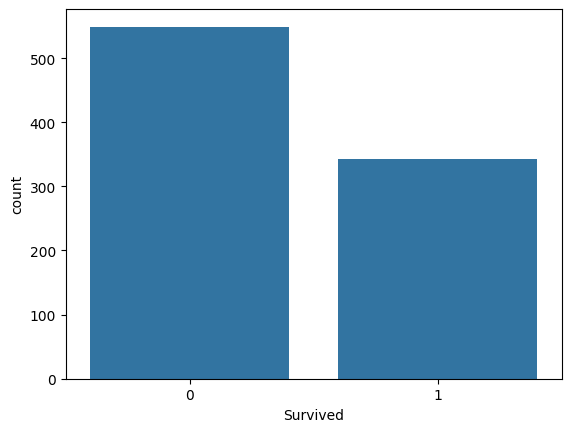

In [22]:
import seaborn as sns
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Age', ylabel='Count'>

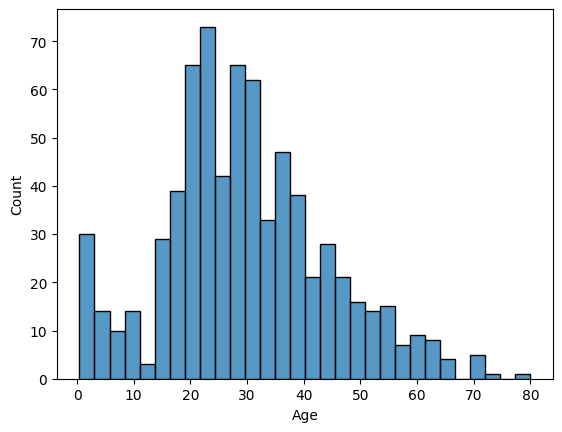

In [32]:
sns.histplot(df['Age'].dropna(), bins=30)

<Axes: xlabel='Sex', ylabel='count'>

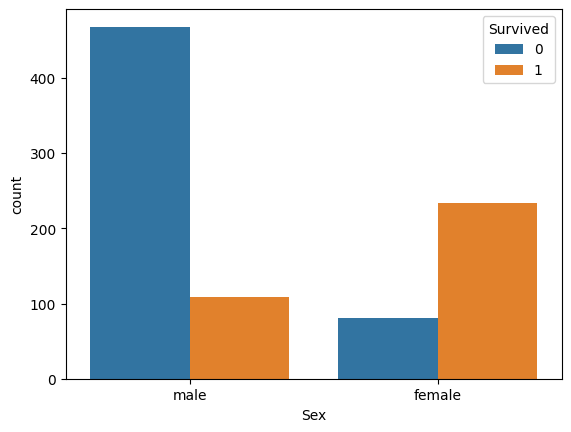

In [24]:
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

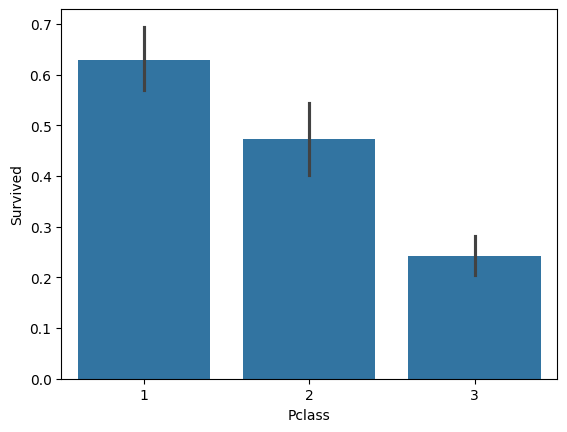

In [25]:
sns.barplot(x='Pclass', y='Survived', data=df)

<Axes: >

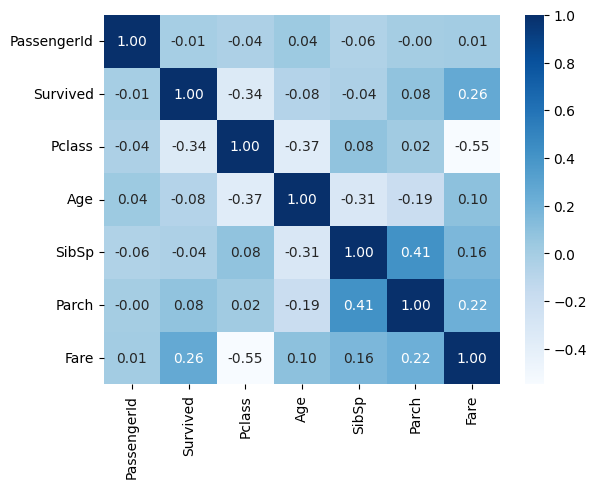

In [54]:
#수치형 변수 간 상관관계
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='Blues')
#SibSp & Parch --> 0.41

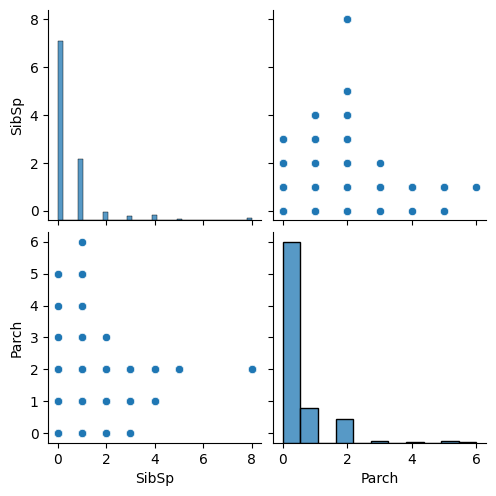

In [56]:
sns.pairplot(df[['SibSp', 'Parch']].dropna())

<Axes: xlabel='SibSp', ylabel='Count'>

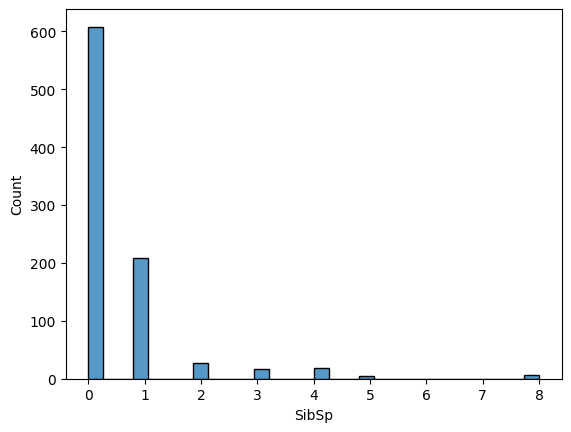

In [64]:
sns.histplot(df['SibSp'].dropna(), bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

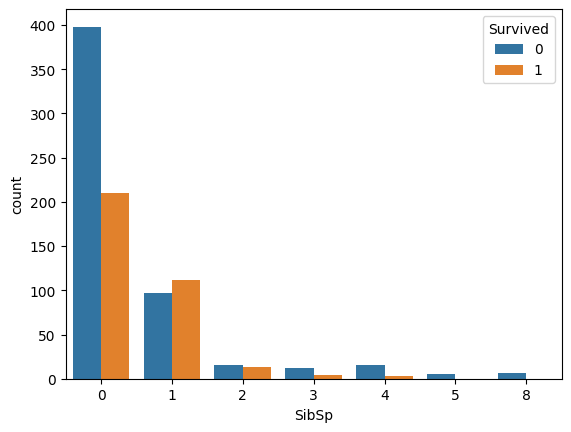

In [59]:
sns.countplot(x='SibSp', hue='Survived', data=df)
#sibling, spouse와 동승한 승객은 생존률이 높다

<Axes: xlabel='Parch', ylabel='count'>

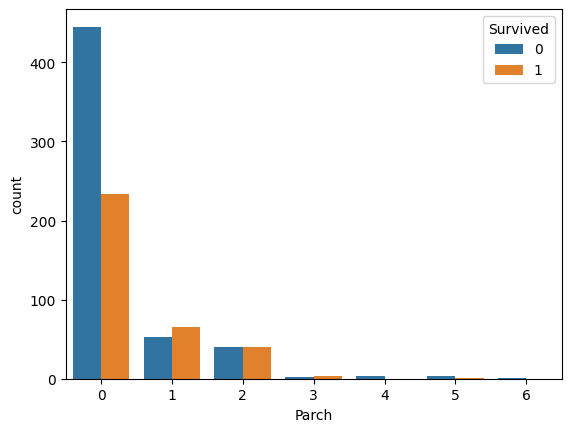

In [66]:
sns.countplot(x='Parch', hue='Survived', data=df)
#Parch도 마찬가지

앞서 상관관계에서 서로 유사도가 높은점 + SibSp, Parch 데이터를 통해 혼자 탑승한 승객은 생존률이 낮다는 결론?

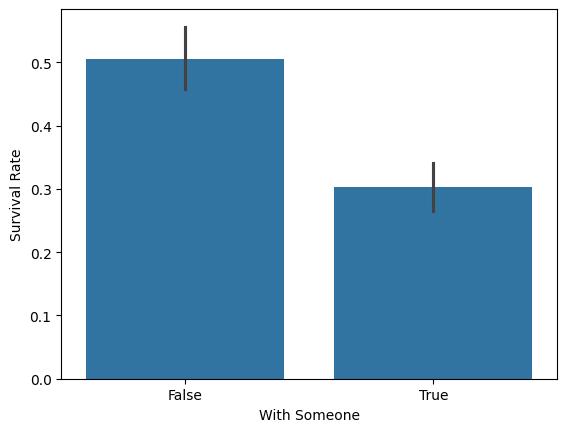

In [79]:
df['alone'] = (df['SibSp'] + df['Parch'] == 0) # SibSp & Parch 값이 둘 다 0 일 경우 혼자 탑승한 것과 마찬가지
survival_rate = df.groupby('alone')['Survived'].mean()
sns.barplot(x = 'alone', y = 'Survived', data = df)
plt.ylabel('Survival Rate')
plt.xlabel('With Someone')
plt.show()